### Exercise 1 <br>
Familiarize yourself with the heights data set provided with the modelr package.

In [ ]:
install.packages("modelr")

In [1]:
library(tidyverse)
library(modelr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
installed.packages()

In [2]:
sessionInfo()

R version 4.2.0 (2022-04-22 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] modelr_0.1.8    forcats_0.5.1   stringr_1.4.0   dplyr_1.0.9    
 [5] purrr_0.3.4     readr_2.1.2     tidyr_1.2.0     tibble_3.1.7   
 [9] ggplot2_3.3.6   tidyverse_1.3.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7     tidyselect_1.1.2 repr_1.1.4       haven_2.5.0     
 [5] colorspace_2.0-3 vctrs_0.4.1      generics_0.1.2   htmltools_0.5.2 
 [9] base64enc_0.1-3  utf8_1.2.2       rlang_1.0.2      pillar_1.7.0    
[13] glue_1.6.2       withr_2.5.0      DBI_1.1.2        dbplyr_2.1.

In [3]:
ls("package:modelr") 

[1] "%>%"                  "add_predictions"      "add_predictors"      
 [4] "add_residuals"        "bootstrap"            "crossv_kfold"        
 [7] "crossv_loo"           "crossv_mc"            "data_grid"           
[10] "fit_with"             "formulae"             "formulas"            
[13] "gather_predictions"   "gather_residuals"     "geom_ref_line"       
[16] "heights"              "mae"                  "mape"                
[19] "model_matrix"         "mse"                  "na.warn"             
[22] "permute"              "permute_"             "qae"                 
[25] "resample"             "resample_bootstrap"   "resample_partition"  
[28] "resample_permutation" "rmse"                 "rsae"                
[31] "rsquare"              "seq_range"            "sim1"                
[34] "sim2"                 "sim3"                 "sim4"                
[37] "spread_predictions"   "spread_residuals"     "typical"

In [4]:
head(heights)

income,height,weight,age,marital,sex,education,afqt
<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
19000,60,155,53,married,female,13,6.841
35000,70,156,51,married,female,10,49.444
105000,65,195,52,married,male,16,99.393
40000,63,197,54,married,female,14,44.022
75000,66,190,49,married,male,14,59.683
102000,68,200,49,divorced,female,18,98.798


### Exercise 2 <br>
Create a list of formulas for modeling income with:
(*height)
(*height * weight)
(*linear combination of all variables)

Formula 1: Income and height

In [5]:
incomeHeight <- lm(income ~ height, data=heights)
incomeHeight


Call:
lm(formula = income ~ height, data = heights)

Coefficients:
(Intercept)       height  
    -158888         2982  


Formula 2: Income with height*weight

In [6]:
incomeHeightWeight <- lm(income ~ height*weight, data=heights)
incomeHeightWeight


Call:
lm(formula = income ~ height * weight, data = heights)

Coefficients:
  (Intercept)         height         weight  height:weight  
   -2.075e+05      3.933e+03      1.044e+02     -2.741e+00  


Formula 3: income with all varaibles

In [7]:
incomeAllVars <- lm(income ~ height + weight + age + marital + sex + education + afqt, data = heights)
incomeAllVars


Call:
lm(formula = income ~ height + weight + age + marital + sex + 
    education + afqt, data = heights)

Coefficients:
     (Intercept)            height            weight               age  
       -44409.17            293.26            -22.62           -401.81  
  maritalmarried  maritalseparated   maritaldivorced    maritalwidowed  
        14204.65           3364.49           5586.83          10663.36  
       sexfemale         education              afqt  
       -24815.77           5944.87            389.42  


### Exercise 3 <br>
From the data, remove rows containing NA’s. Fit the linear model with the formulas from exercise 2.

In [8]:
na.omit(heights)

income,height,weight,age,marital,sex,education,afqt
<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
19000,60,155,53,married,female,13,6.841
35000,70,156,51,married,female,10,49.444
105000,65,195,52,married,male,16,99.393
40000,63,197,54,married,female,14,44.022
75000,66,190,49,married,male,14,59.683
102000,68,200,49,divorced,female,18,98.798
0,74,225,48,married,male,16,82.260
70000,64,160,54,divorced,female,12,50.283
60000,69,162,55,divorced,male,12,89.669


### Fitting the linear models

Formula 1: Income and Height

In [9]:
incomeHeight.lm <- lm(formula=incomeHeight, data = heights)
summary(incomeHeight.lm)


Call:
lm(formula = incomeHeight, data = heights)

Residuals:
   Min     1Q Median     3Q    Max 
-91583 -31511 -10893  14882 320828 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -158888.1    10733.8  -14.80   <2e-16 ***
height         2981.8      159.7   18.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54550 on 7004 degrees of freedom
Multiple R-squared:  0.04744,	Adjusted R-squared:  0.0473 
F-statistic: 348.8 on 1 and 7004 DF,  p-value: < 2.2e-16


Formula 2: Income, Weight*Height

In [10]:
incomeHeightWeight.lm <- lm(formula = incomeHeightWeight, data=heights)
summary(incomeHeightWeight.lm )


Call:
lm(formula = incomeHeightWeight, data = heights)

Residuals:
   Min     1Q Median     3Q    Max 
-99489 -30769 -10942  14840 322691 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.075e+05  4.488e+04  -4.622 3.87e-06 ***
height         3.933e+03  6.747e+02   5.829 5.84e-09 ***
weight         1.044e+02  2.288e+02   0.456    0.648    
height:weight -2.741e+00  3.386e+00  -0.809    0.418    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54720 on 6907 degrees of freedom
  (95 observations deleted due to missingness)
Multiple R-squared:  0.05086,	Adjusted R-squared:  0.05045 
F-statistic: 123.4 on 3 and 6907 DF,  p-value: < 2.2e-16


Formula 3: Income and all variables

In [11]:
incomeAllVars.lm<-lm(formula=incomeAllVars, data = heights)

summary(incomeAllVars.lm)


Call:
lm(formula = incomeAllVars, data = heights)

Residuals:
    Min      1Q  Median      3Q     Max 
-115521  -25139   -5477   14904  326890 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -44409.17   20565.27  -2.159  0.03085 *  
height              293.26     227.77   1.288  0.19796    
weight              -22.62      15.41  -1.468  0.14227    
age                -401.81     270.53  -1.485  0.13753    
maritalmarried    14204.65    1754.67   8.095 6.74e-16 ***
maritalseparated   3364.49    3055.37   1.101  0.27086    
maritaldivorced    5586.83    1990.67   2.807  0.00502 ** 
maritalwidowed    10663.36    4290.03   2.486  0.01296 *  
sexfemale        -24815.77    1744.56 -14.225  < 2e-16 ***
education          5944.87     289.14  20.561  < 2e-16 ***
afqt                389.42      26.52  14.685  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49100 on 6634 degrees of freedom
  (361

Exercise 4
For each fit, calculate RMSE.

In [12]:
# Root mean square error (RMSE)
# Formula 1
rmse(incomeHeight.lm, data=heights)

[1] 54546.47

In [13]:
# Formula 2
rmse(incomeHeightWeight.lm, data=heights)

[1] 54706.7

In [14]:
# Formula 3
rmse(incomeAllVars.lm, data=heights)

[1] 49056.82

Exercise 5
For each model, add residuals to the data and plot their distribution. (Hint: use lift_dl().)

In [15]:
res1 <- resid(incomeHeight.lm )
res1

1             2             3             4             5 
 -1020.190476 -14838.231688  70070.788918  11034.397161  37088.984797 
            6             7             8             9            10 
 58125.376554 -61765.448173  38052.593039  13143.572433 103143.572433 
           11            12            13            14            15 
 83052.593039 317846.201282   8052.593039  -2911.015203  64107.180676 
           16            17            18            19            20 
 -9947.798718 -38674.623446 -31947.406961  -4856.427567 -43874.623446 
           21            22            23            24            25 
  3161.768312 -11338.231688   6088.984797  64034.397161   6198.160069 
           26            27            28            29            30 
  7088.984797  68234.551827 -10801.839931 -37911.015203  19198.160069 
           31            32            33            34            35 
 29125.376554  20070.788918 288028.160069 -43874.623446  -7911.015203 
           36            37            38            39            40 
-25871.798718  -1856.427567  54161.768312 -37911.015203   1161.768312 
           41            42            43            44            45 
112179.964190 -43874.623446 282064.551827 -49838.231688  83234.551827 
           46            47            48            49            50 
 -9838.231688   4088.984797  83052.593039  11216.355948  61034.397161 
           51            52            53            54            55 
-20874.623446 -55801.839931 -46856.427567 -37911.015203  -1001.994597 
           56            57            58            59            60 
-19874.623446 -30801.839931  67179.964190 -18892.819324  18961.613646 
           61            62            63            64            65 
 37161.768312    125.376554  15070.788918  21034.397161 -40892.819324 
           66            67            68            69            70 
-31947.406961     70.788918  45070.788918  47179.964190  13107.180676 
           71            72            73            74            75 
 78143.572433   7143.572433  16125.376554  34198.160069  14016.201282 
           76            77            78            79            80 
-11874.623446    161.768312 -27838.231688 -52801.839931  28052.593039 
           81            82            83            84            85 
 16216.355948 -22751.994597   9198.160069  41179.964190 -25983.798718 
           86            87            88            89            90 
 39107.180676 -23001.994597 136118.984797 -28965.602839  36125.376554 
           91            92            93            94            95 
 28143.572433  33052.593039  12161.768312 -20304.211082 -33838.231688 
           96            97            98            99           100 
 49125.376554  -7401.994597  -2838.231688  76088.984797 -34929.211082 
          101           102           103           104           105 
 82052.593039 -23001.994597 -39838.231688 -43874.623446  99016.201282 
          106           107           108           109           110 
 36034.397161  39107.180676   8125.376554  21016.201282  12088.984797 
          111           112           113           114           115 
 21143.572433 -47678.231688 -28965.602839  64161.768312 -25983.798718 
          116           117           118           119           120 
 44979.809524 -27911.015203   9198.160069  16998.005403  32179.964190 
          121           122           123           124           125 
-49838.231688   6070.788918    198.160069  78052.593039 -25911.015203 
          126           127           128           129           130 
 65252.747705 113034.397161 106125.376554   9016.201282  80161.768312 
          131           132           133           134           135 
 94198.160069   3395.201282 293991.768312 -40892.819324  11034.397161 
          136           137           138           139           140 
-36856.427567 -45783.644052 -21583.798718  15161.768312 -23965.602839 
          141           142         

Income and height distribution with residuals

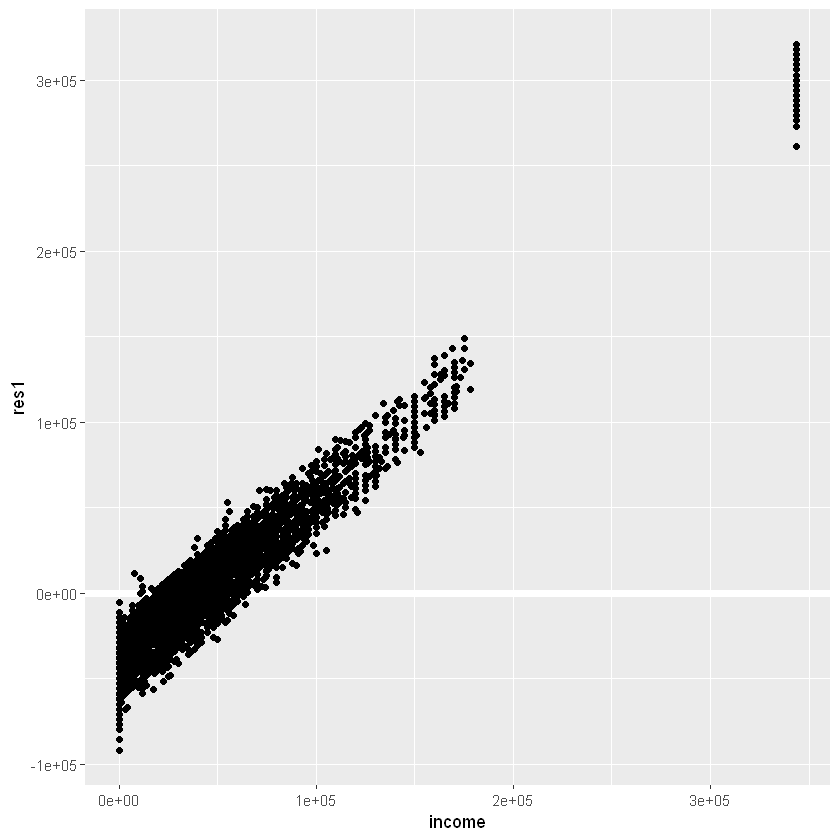

In [16]:
ggplot(incomeHeight.lm, aes(income,res1)) + geom_ref_line(h=0) + geom_point()

Income, height, and weight distrubtion with residuals

In [17]:
res2 = resid(incomeHeightWeight.lm )
res2

1             2             3             4             5 
  -200.711141 -19192.058862  71210.339829  13143.384591  37429.584907 
            6             7             8             9            10 
 58425.532950 -61420.942283  37122.865692   9821.433391 102532.643090 
           11            12            13            14            15 
 81057.558408 318596.604440   6057.558408  -7313.564674  62987.473341 
           16            17            18            19            20 
 -9197.395560 -40424.075540 -31456.724596  -5128.455697 -43000.576673 
           21            22            23            24            25 
  4493.248466 -15167.261263   5282.048718  63002.526574   4887.380785 
           26            27            28            29            30 
  5899.536655  69661.789044  -5606.245664 -32980.270338  19281.603689 
           31            32            33            34            35 
 31885.063138  21579.147074 287646.862721 -41688.827239 -10783.516422 
           36            37            38            39            40 
-28398.323489   1430.007033  55843.113532 -37187.903030   8528.420861 
           41            42            43            44            45 
109648.188685 -41934.780258 281424.756511 -55591.519128  82102.605908 
           46            47            48            49            50 
 -7719.555135   1522.493228  78926.943840   9502.842744  59661.128964 
           51            53            54            55            56 
-25083.605727 -43739.443574 -39100.463345    -80.616589 -18754.623654 
           57            58            59            60            61 
-32112.619215  62663.629623 -22152.097813  23746.110344  35956.726735 
           62            63            64            65            66 
 -3673.684029  12891.074620  19592.849442 -40586.145889 -31811.827024 
           67            68            69            70            71 
  1579.147074  41415.845638  50782.280331  11828.986589  78040.994909 
           72            73            74            75            76 
  8142.423849  13638.065404  31493.157881  15421.990026 -13214.153842 
           77            78            79            81            82 
  4904.432863 -30092.868464 -48535.727600  17373.517456 -24656.508368 
           83            84            85            86            87 
  6307.261494  40271.918826 -16516.767267  40206.287872 -21766.628613 
           88            89            90            91            92 
133399.488403 -31226.504823  36261.564271  26346.488847  31057.558408 
           93            94            95            96            97 
 14280.444865 -19754.751764 -37842.193796  47949.814838  -8364.544442 
           98            99           100           101           102 
 -1156.886468  77959.633159 -37846.539871  80057.558408 -21138.652662 
          103           104           105           106           107 
-39643.813000 -44394.310446  97800.447683  35343.924185  38779.907102 
          108           109           110           111           112 
 18263.653701  19145.062097   7456.928089  19346.488847 -48183.543132 
          113           114           115           116           117 
-27334.572064  61907.131536 -15926.920239  47300.704649 -32160.559849 
          118           119           120           121           122 
  7887.380785  16035.455558  36684.352632 -50780.874465   2784.652883 
          123           124           125           126           127 
 -2971.583087  77335.927149 -27865.487471  59698.634138 113299.837494 
          128           129           130           131           132 
103638.065404   7145.062097  79044.193002  92887.380785   2834.833269 
          133           134           135           136           137 
293049.125535 -40189.929008   7271.345691 -36535.378576 -40798.916260 
          138           140           141           142           143 
-23979.246372 -27455.536221  -4788.914375  72999.531432 300866.552828 
          144           145         

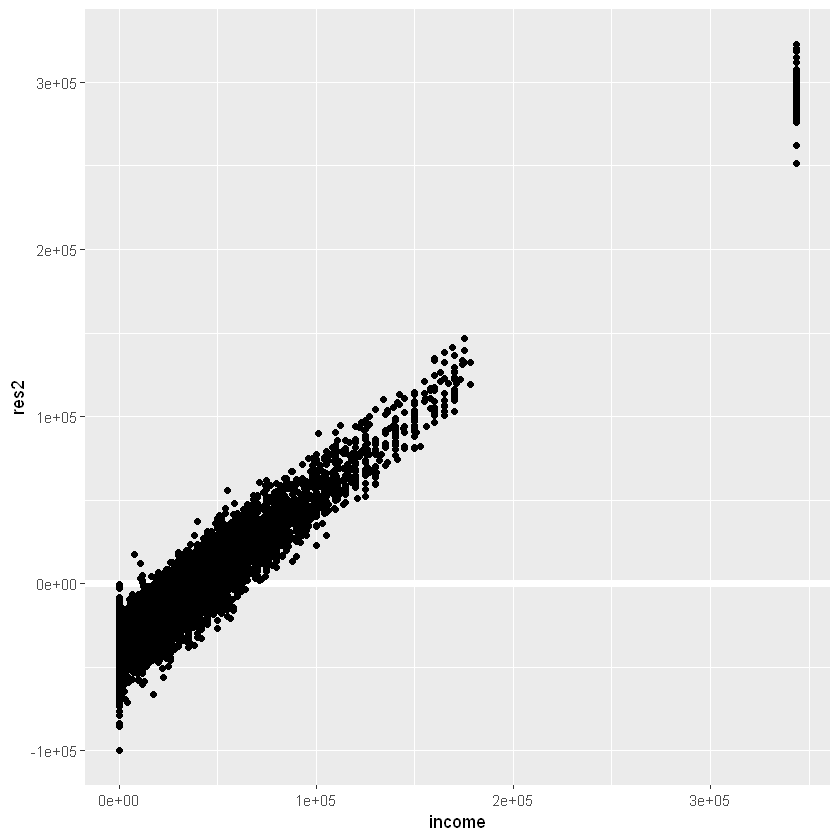

In [18]:
ggplot(incomeHeightWeight.lm, aes(income,res2)) + geom_ref_line(h=0) + geom_point()

Distrubtion with residuals for all variables (Income, height, weight, age, marital status, sex,  
    education, afqt)

In [19]:
res3 = resid(incomeAllVars.lm)
res3

1             2             3             4             5 
 1.278523e+03  1.480914e+04  7.623239e+03  2.326580e+03  3.364989e+03 
            6             7             8             9            10 
 2.442664e+04 -9.427302e+04  4.926597e+04 -1.906671e+03  8.001389e+04 
           11            12            13            14            15 
 5.460954e+04  2.754562e+05 -2.200393e+04 -8.786527e+03  6.728682e+03 
           16            17            18            21            23 
-5.515177e+04 -1.629607e+04 -1.898609e+04  2.428788e+04  1.206162e+04 
           24            25            26            27            28 
 7.673184e+04  1.511392e+04 -1.760131e+04  4.657907e+04 -1.481312e+02 
           29            30            31            32            33 
-6.877336e+03  9.518885e+03  2.401285e+04  1.517707e+04  2.778552e+05 
           34            35            36            37            38 
-1.535429e+04  1.598340e+04 -7.457799e+04 -2.813585e+04  3.560458e+04 
           39            40            41            42            43 
-6.167351e+04  2.255830e+04  7.003200e+04 -4.850356e+04  2.355738e+05 
           44            45            47            48            49 
-7.631116e+04  2.487807e+04 -1.027960e+04  4.675736e+04  3.120627e+03 
           50            51            53            54            55 
 2.456604e+04 -7.318748e+04 -2.991609e+04 -9.797613e+03  2.976498e+04 
           56            57            58            59            60 
-1.517627e+04 -6.586987e+04  2.831167e+04 -2.355294e+04  1.866957e+04 
           61            63            64            65            66 
 4.651028e+04  3.406068e+04  2.465817e+04 -4.488445e+04 -4.246118e+04 
           68            69            70            71            72 
 5.418075e+04  2.047466e+04  2.045720e+04  3.113581e+04 -3.168824e+04 
           73            74            75            76            77 
-6.088552e+04  2.289554e+04  1.287711e+04  7.647440e+03 -4.061984e+04 
           78            79            81            82            83 
-1.006291e+04 -8.095653e+04  1.785063e+04 -2.964405e+04 -9.494069e+03 
           84            85            86            87            88 
 1.174220e+04 -4.202683e+04  2.227510e+04  3.653820e+03  1.044721e+05 
           89            90            91            92            94 
-7.027238e+04  5.008296e+03  6.110879e+03 -3.932527e+03 -1.198808e+04 
           95            96            97            98            99 
-3.212897e+04  3.009206e+04 -3.810449e+03 -4.885664e+03  8.679642e+04 
          100           101           103           104           105 
-3.637736e+04  5.404788e+04 -3.695560e+04 -2.285758e+04  4.911229e+04 
          106           107           108           109           110 
-1.301612e+04  2.711019e+04  2.505132e+04  2.807484e+04  1.993729e+04 
          111           112           113           114           115 
-3.450171e+03 -3.365005e+04 -3.546824e+03  2.070660e+04  2.621542e+04 
          116           118           119           122           123 
 3.169482e+04 -2.481915e+04  1.868393e+04 -1.762036e+04  1.267940e+03 
          124           125           126           127           128 
 6.710230e+04  1.930442e+04  5.975187e+04  7.581664e+04  3.004475e+04 
          129           130           131           132           133 
-3.199159e+04  5.289169e+04  4.406631e+04  2.031742e+04  2.455813e+05 
          134           135           136           137           138 
-4.204825e+04  1.868550e+04 -8.213757e+04 -4.872606e+04 -1.191487e+04 
          140           141           142           143           144 
-6.088721e+04 -9.181857e+03  3.886249e+04  2.533822e+05  4.335347e+04 
          145           146           147           148           149 
 4.166271e+04  3.512281e+04  4.153523e+04  1.483289e+04  2.286003e+04 
          150           151           152           153           154 
 2.425911e+03  2.460492e+04  3.073733e+04  3.416025e+04 -2.143894e+04 
          155           156         

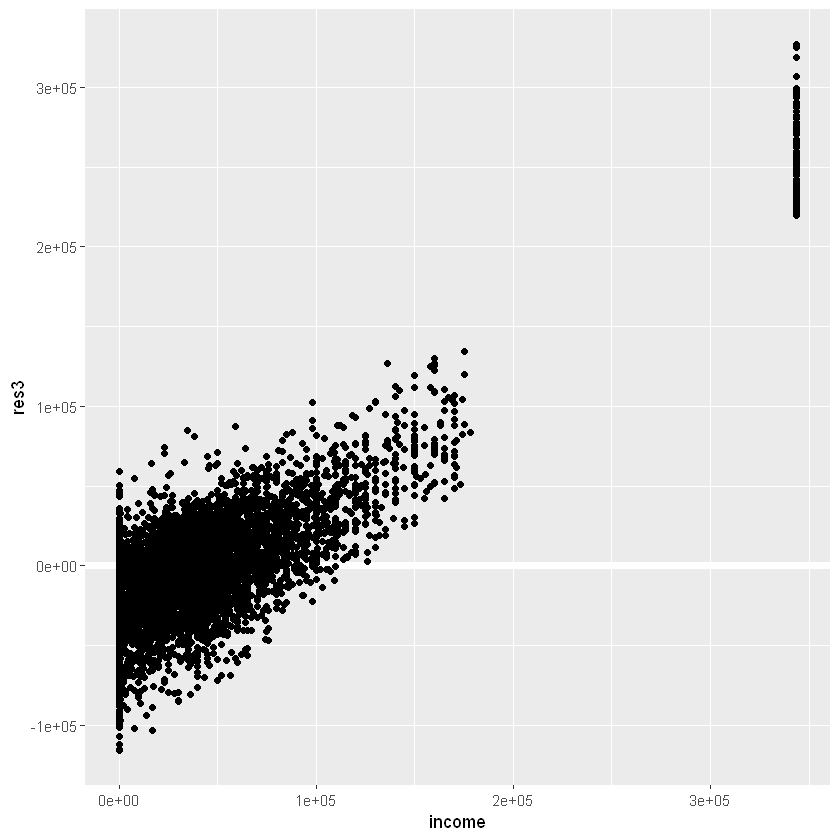

In [20]:
ggplot(incomeAllVars.lm, aes(income,res3)) + geom_ref_line(h=0) + geom_point()